<a href="https://colab.research.google.com/github/diya0510/Data-Analysis/blob/main/Covid19_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the required libraries**

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
import plotly.express as px

**Reading the csv files**

In [ ]:
covid=pd.read_csv('covid_19_india.csv')
vaccine=pd.read_csv('covid_vaccine_statewise.csv')
covid.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
#numerical features
covid.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


**Data reduction**

In [ ]:
#removing the colums from the datset which are not required for analysis purpose
#usinf the drop function
#the inplace paramter modifies in the orginal dataFrame
covid.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True,axis=1)
covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


**Data Formatting **

In [ ]:
#changing the format of date
covid['Date']=pd.to_datetime(covid['Date'],format='%Y-%m-%d')
covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


**Data Transformation**

In [ ]:
#adding an essential attribute which is active cases
covid['Active cases']=covid['Confirmed']-(covid['Cured']+covid['Deaths'])
covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


**Pivot Table**

In [ ]:
#creating aa pivot table
#a pivot table is kind of a summary table for numerical values using aggregate functions
#it has parameters for index column and value
statewise=pd.pivot_table(covid,index='State/UnionTerritory',values=['Cured','Deaths','Confirmed','Active cases'],aggfunc=max,fill_value=0)
statewise

,Active cases,Confirmed,Cured,Deaths
State/UnionTerritory,,,,
Andaman and Nicobar Islands,1154,7548,7412,129
Andhra Pradesh,211554,1985182,1952736,13564
Arunachal Pradesh,4465,50605,47821,248
Assam,56295,576149,559684,5420
Bihar,115152,725279,715352,9646
Bihar****,5044,715730,701234,9452
Cases being reassigned to states,9265,9265,0,0
Chandigarh,8653,61992,61150,811
Chhattisgarh,131245,1003356,988189,13544


**Data Transformation**

**Recovery Rate & Mortality Rate**

In [ ]:
#finding the recovery rate
#recovery rate=cured/confirmed
statewise['recovery rate']=statewise['Cured']*100/statewise['Confirmed']
statewise.head()

,Active cases,Confirmed,Cured,Deaths,recovery rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,1154,7548,7412,129,98.198198
Andhra Pradesh,211554,1985182,1952736,13564,98.365591
Arunachal Pradesh,4465,50605,47821,248,94.498567
Assam,56295,576149,559684,5420,97.142232
Bihar,115152,725279,715352,9646,98.631285


In [ ]:
#finding the mortality rate
#mortality  rate=deaths/confirmed
statewise['mortality rate']=statewise['Deaths']*100/statewise['Confirmed']
statewise.head()

,Active cases,Confirmed,Cured,Deaths,recovery rate,mortality rate
State/UnionTerritory,,,,,,
Andaman and Nicobar Islands,1154,7548,7412,129,98.198198,1.709062
Andhra Pradesh,211554,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,4465,50605,47821,248,94.498567,0.490070
Assam,56295,576149,559684,5420,97.142232,0.940729
Bihar,115152,725279,715352,9646,98.631285,1.329971


In [ ]:
#sorting the values in the pivot table based on the confiremd cases in descending order
statewise=statewise.sort_values(by=['Confirmed'],ascending=False)

In [ ]:
#the resulting pivot table will be printed by styling it
#the styler API is present in pandas for making the table look more efficient
#background_gradient is a function used for highlighting the highs and lows in a table
#similarly there are other functions such as bar,highlight_max
statewise.style.background_gradient(cmap='Purples')

,Active cases,Confirmed,Cured,Deaths,recovery rate,mortality rate
State/UnionTerritory,,,,,,
Maharashtra,701614,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,97932,6229596,6000911,130753,96.329056,2.098900
Kerala,445692,3586693,3396184,18004,94.688450,0.501967
Karnataka,605515,2921049,2861499,36848,97.961349,1.261465
Karanataka,27550,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,313048,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,211554,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,310783,1708812,1685492,22775,98.635309,1.332797
West Bengal,132181,1534999,1506532,18252,98.145471,1.189056


In [ ]:
#top 10 states based on the number of active cases
top10=statewise.sort_values(by=['Active cases'],ascending=False)
top10[0:10]

,Active cases,Confirmed,Cured,Deaths,recovery rate,mortality rate
State/UnionTerritory,,,,,,
Maharashtra,701614,6363442,6159676,134201,96.797865,2.108937
Karnataka,605515,2921049,2861499,36848,97.961349,1.261465
Kerala,445692,3586693,3396184,18004,94.688450,0.501967
Tamil Nadu,313048,2579130,2524400,34367,97.877967,1.332504
Uttar Pradesh,310783,1708812,1685492,22775,98.635309,1.332797
Rajasthan,212753,953851,944700,8954,99.040626,0.938721
Andhra Pradesh,211554,1985182,1952736,13564,98.365591,0.683262
Gujarat,148297,825085,814802,10077,98.753704,1.221329
West Bengal,132181,1534999,1506532,18252,98.145471,1.189056


In [ ]:
top10=covid.groupby(by=['State/UnionTerritory']).max()[['Active cases','Date']].sort_values(by=['Active cases'],ascending=False).reset_index()
top10[0:10]

,State/UnionTerritory,Active cases,Date
0,Maharashtra,701614,2021-08-11
1,Karnataka,605515,2021-08-11
2,Kerala,445692,2021-08-11
3,Tamil Nadu,313048,2021-08-11
4,Uttar Pradesh,310783,2021-08-11
5,Rajasthan,212753,2021-08-11
6,Andhra Pradesh,211554,2021-08-11
7,Gujarat,148297,2021-08-11
8,West Bengal,132181,2021-08-11
9,Chhattisgarh,131245,2021-08-11


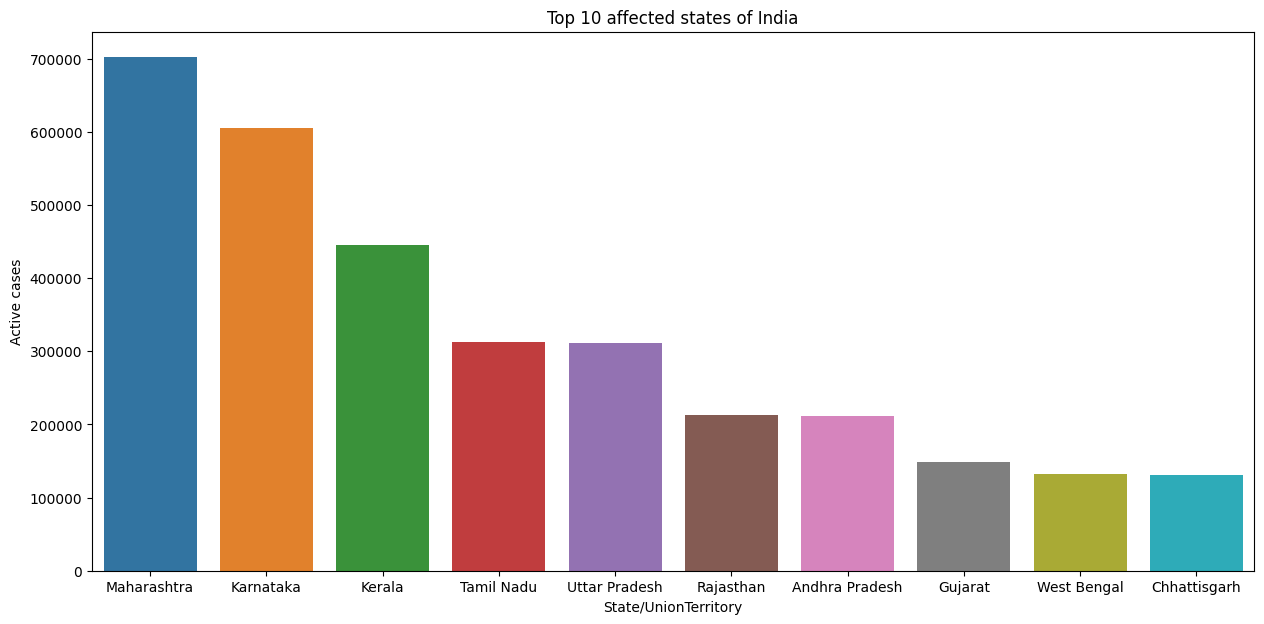

In [ ]:
#bar graph for representation of the states according to their active cases
plt.figure(figsize=(15,7))
plt.title('Top 10 affected states of India')
sns.barplot(x='State/UnionTerritory',y='Active cases',data=top10[0:10])
plt.show()

In [ ]:
#Top states with highest deaths
#using the group by function
#this function groups the rows based on one or more columns and uses a agg function along with it to give the best results
top10_deaths=covid.groupby(by=['State/UnionTerritory']).max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()
top10_deaths[0:10]

,State/UnionTerritory,Deaths,Date
0,Maharashtra,134201,2021-08-11
1,Maharashtra***,130753,2021-07-21
2,Karnataka,36848,2021-08-11
3,Karanataka,36197,2021-07-20
4,Tamil Nadu,34367,2021-08-11
5,Delhi,25068,2021-08-11
6,Uttar Pradesh,22775,2021-08-11
7,West Bengal,18252,2021-08-11
8,Kerala,18004,2021-08-11
9,Punjab,16322,2021-08-11


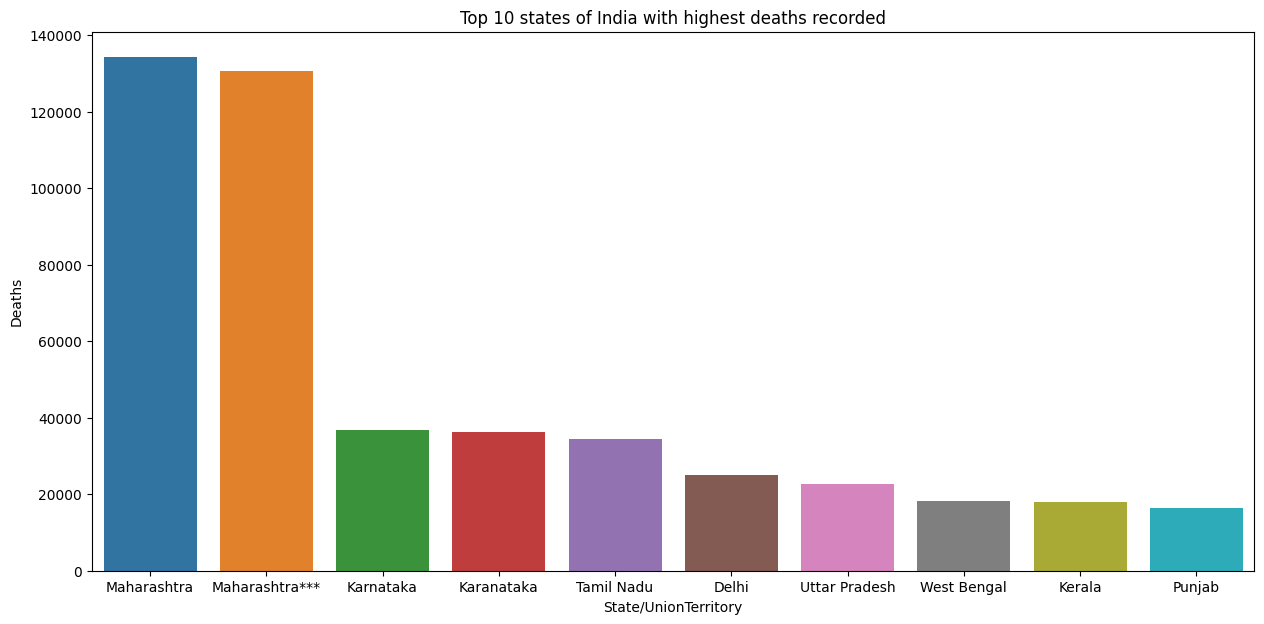

In [ ]:
#bar plot for the deaths
plt.figure(figsize=(15,7))
plt.title('Top 10 states of India with highest deaths recorded')
sns.barplot(x='State/UnionTerritory',y='Deaths',data=top10_deaths[0:10],linewidth=1)
plt.show()

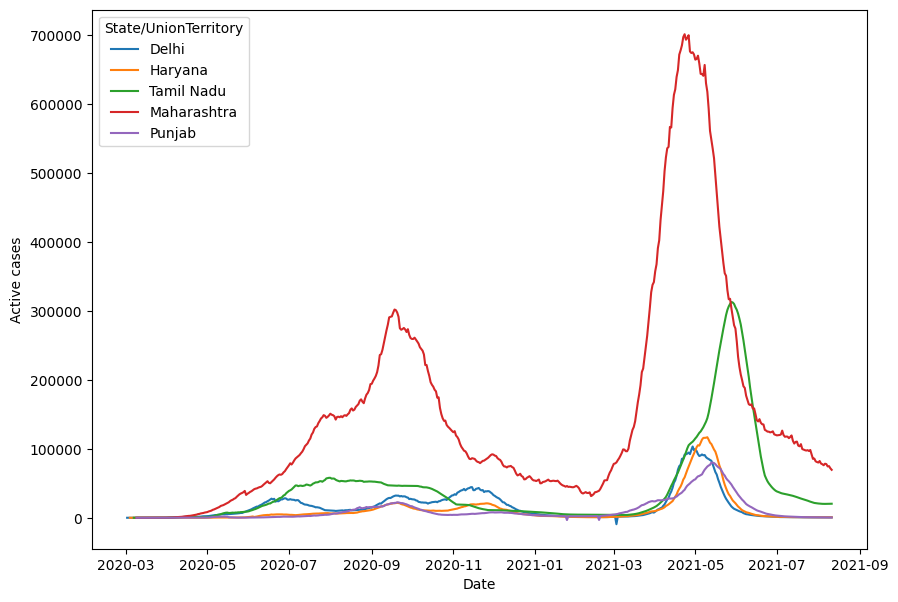

In [ ]:
#line plot to see the active cases growth in different states
plt.figure(figsize=(10,7))
sns.lineplot(x='Date',y='Active cases',data=covid[covid['State/UnionTerritory'].isin(['Maharashtra','Punjab','Haryana','Delhi','Tamil Nadu'])],hue='State/UnionTerritory')
plt.show()

In [ ]:
#vaccination
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
vaccine.rename(columns={'Updated On':'Vaccine Date'},inplace=True)

In [ ]:
vaccine.head()

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [ ]:
vaccine.isnull().sum()

Vaccine Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [ ]:
vaccination=vaccine.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

In [ ]:
vaccination.head()

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
#finding the total number of Male vaccinated and total number of female vaccinated
male=vaccination['Male(Individuals Vaccinated)'].sum()
female=vaccination['Female(Individuals Vaccinated)'].sum()


6321628736.0

In [ ]:
#building a pie chart based on the above information
plt.figure(figsize=(10,7))
a=px.pie(values=[male,female],names=['male','female'])
a.show()

<Figure size 1000x700 with 0 Axes>

In [ ]:
vaccine1=vaccine[vaccine['State']!='India']
vaccine1

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vaccine1.rename(columns={'Total Individuals Vaccinated':'Total'},inplace=True)
vaccine1

<ipython-input-49-69f132bb3533>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Most vaccinated state
v=pd.pivot_table(vaccine1,index='State',values=['Total'],aggfunc=sum,fill_value=0).sort_values(by=['Total'],ascending=False).reset_index()
v

,State,Total
0,Maharashtra,1403075494
1,Uttar Pradesh,1200575482
2,Rajasthan,1141162807
3,Gujarat,1078260544
4,West Bengal,925022706
5,Karnataka,868523530
6,Madhya Pradesh,771864046
7,Bihar,660847900
8,Kerala,620825191
9,Andhra Pradesh,564591113


In [ ]:
v[0:10]

,State,Total
0,Maharashtra,1403075494
1,Uttar Pradesh,1200575482
2,Rajasthan,1141162807
3,Gujarat,1078260544
4,West Bengal,925022706
5,Karnataka,868523530
6,Madhya Pradesh,771864046
7,Bihar,660847900
8,Kerala,620825191
9,Andhra Pradesh,564591113


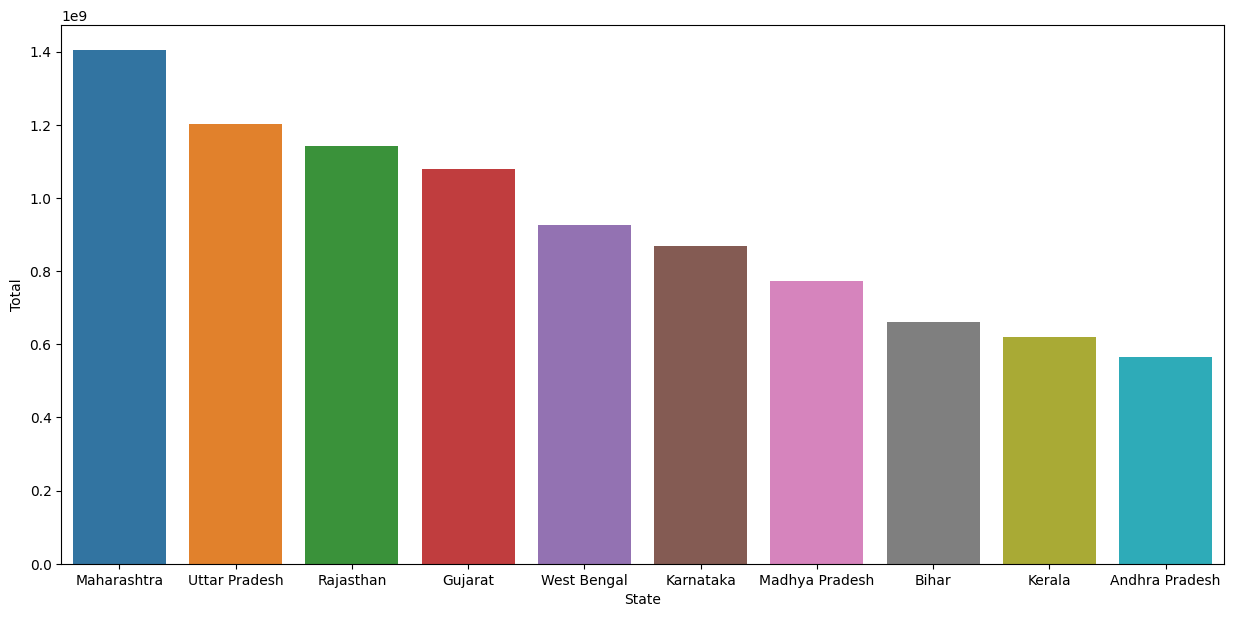

In [ ]:
#bar graph for the above representation of the above information
plt.figure(figsize=(15,7))
sns.barplot(x='State',y='Total',data=v[0:10])
plt.show()

In [ ]:
globe=pd.read_csv('globaldata.csv')
globe.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [ ]:
globe.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,2853,55.0,1499795.0,43136.0,34769277


In [ ]:
#continent wise cases
info=pd.pivot_table(index='continent',values=['total_deaths','active_cases','population'],data=globe).reset_index()
info.sort_values(by=['total_deaths'],ascending=False)

,continent,active_cases,population,total_deaths
5,South America,55633.272727,3.124141e+07,99732.538462
3,Europe,146045.800000,1.559314e+07,38950.106383
4,North America,89977.000000,1.532583e+07,37621.384615
1,Asia,70876.478261,9.535624e+07,29748.729167
0,Africa,9391.811321,2.414412e+07,4461.736842
2,Australia/Oceania,26792.294118,2.416979e+06,815.214286


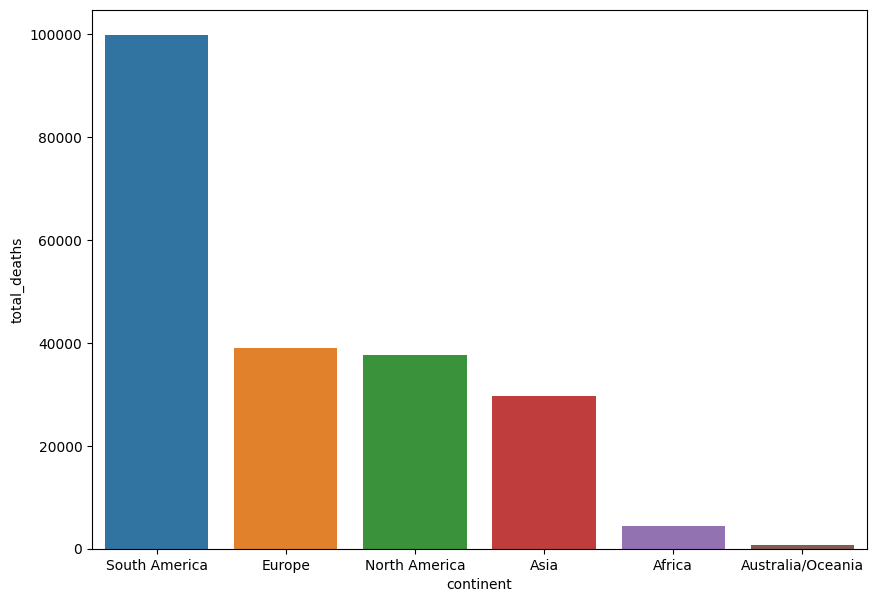

In [ ]:
#bar graph for deaths
plt.figure(figsize=(10,7))
sns.barplot(x='continent',y='total_deaths',data=info)
plt.show()

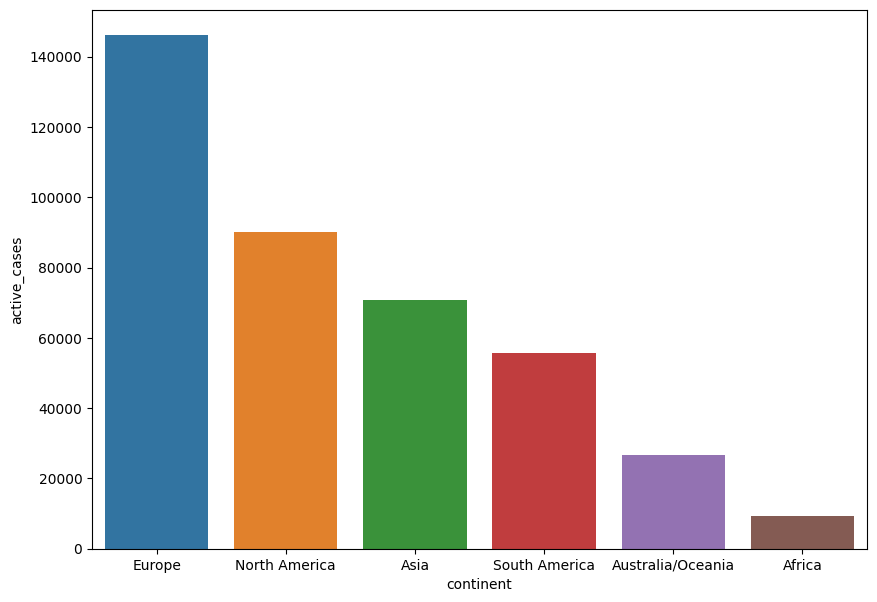

In [ ]:
#bar graph for the active cases
info=info.sort_values(by=['active_cases'],ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x='continent',y='active_cases',data=info)
plt.show()

In [ ]:
country=pd.pivot_table(index='country',values=['total_deaths','active_cases','total_confirmed'],data=globe,aggfunc=sum).reset_index()
country

,country,active_cases,total_confirmed,total_deaths
0,Afghanistan,9375.0,179267,7690.0
1,Albania,251.0,275574,3497.0
2,Algeria,80570.0,265816,6875.0
3,Andorra,982.0,42156,153.0
4,Angola,145.0,99194,1900.0
...,...,...,...,...
221,Wallis And Futuna Islands,9.0,454,7.0
222,Western Sahara,0.0,10,1.0
223,Yemen,661.0,11819,2149.0
224,Zambia,611.0,320591,3983.0


In [ ]:
#top 10 countries in aspect of high deaths
d=country.sort_values(by=['total_deaths'],ascending=False)
d[0:10]

,country,active_cases,total_confirmed,total_deaths
212,USA,1938567.0,84209473,1026646.0
26,Brazil,298772.0,30682094,664920.0
94,India,17692.0,43121599,524214.0
165,Russia,235444.0,18260293,377670.0
131,Mexico,376294.0,5745652,324465.0
158,Peru,0.0,3571919,213023.0
211,UK,305201.0,22159805,176708.0
101,Italy,998118.0,17057873,165244.0
95,Indonesia,4784.0,6050776,156458.0
72,France,856871.0,29160802,147257.0


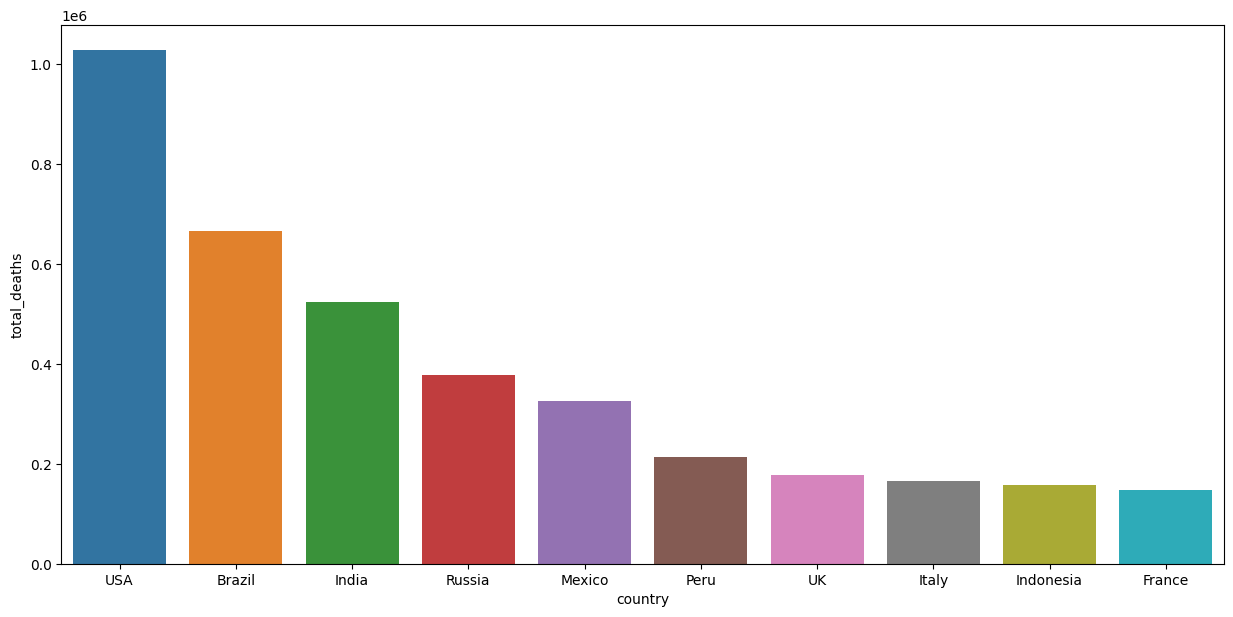

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='country',y='total_deaths',data=d[0:10])
plt.show()

In [ ]:
#top 10 countries in aspect of high deaths
c=country.sort_values(by=['active_cases'],ascending=False)
c[0:10]

,country,active_cases,total_confirmed,total_deaths
212,USA,1938567.0,84209473,1026646.0
78,Germany,1685607.0,25780226,137919.0
220,Viet Nam,1298525.0,10696630,43065.0
101,Italy,998118.0,17057873,165244.0
72,France,856871.0,29160802,147257.0
200,Taiwan,706841.0,768543,1068.0
160,Poland,552117.0,6003436,116207.0
191,Spain,473589.0,12127122,105444.0
10,Australia,386179.0,6593795,7794.0
131,Mexico,376294.0,5745652,324465.0
